In [29]:
import pandas as pd
import os
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
                "pgf.texsystem": "pdflatex",
                'font.family': 'serif',
                'text.usetex': True,
                'pgf.rcfonts': False,
            })

In [30]:
exp_type = 'simulation'
exp = 'pv2'
#exp_name = '2024_03_22-16_00_41' #10C
exp_name = '2024_03_22-10_41_54' #pv2

**Prepare structures and functions to plot everything we need**

In [31]:
folder_exp_dict = {'pv': 'PV_profile', '20C': '20C_check_up', '10C': '30C_check_up', 'pv2': 'PV_profile2',}

In [32]:
folder = "../data/output/" + exp_type + '/'
folder_path = Path(folder)

ground_file = folder_path / folder_exp_dict[exp] / exp_name / 'ground.csv'
output_file = folder_path / folder_exp_dict[exp] / exp_name / 'dataset.csv'

In [33]:
def plot_separated_vars(df, 
                        variables: list, 
                        x_var: str, 
                        x_label: list, 
                        y_labels : list, 
                        legend_labels: list, 
                        markers: list,
                        title: str, 
                        colors=None, 
                        save_figs=False, 
                        fig_name='',
                        fig_format='svg'
                       ):
    if not colors:
        colors = ['cyan', 'violet', 'purple', 'magenta']
    
    fig, axes = plt.subplots(len(variables), 1, figsize=(15, 4 * len(variables)), sharex=True)
    
    # Plot iteratively all the variables
    for i, var in enumerate(variables):
        
        # We need this assignement in the case of a single variable
        if len(variables) == 1:
            ax = axes
        else:
            ax = axes[i]
        
        # Command for the grid
        ax.grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
        ax.minorticks_on()
        ax.grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
        
        ax.plot(df[x_var], df[var], label=legend_labels[i], color=colors[i], marker=markers[i], markevery=5000)
        #ax.scatter(df[x_var], df[var], label=legend_labels[i], color=colors[i],)

        
        ax.ticklabel_format(style='plain')
        ax.tick_params(labelsize=30)
        ax.set_xlabel(x_label, size=34)
        ax.set_ylabel(y_labels[i], size=34)
        
        #ax.legend(fontsize=20)
    
    #fig.suptitle(title, fontsize=20)
    
    plt.show()
    
    if save_figs:
        fig.savefig("{}.{}".format(fig_name, fig_format, bbox_inches='tight', transparent=True), format=fig_format)

### PLOT SEPARATED DATA

In [34]:
df_ground = pd.read_csv(ground_file)
#df_ground['current'] = df_ground['current'].values * (-1)
df_ground

,current,voltage,temperature,power,time
0,9.9977,3.7651,295.7052,37.642267,0.0
1,9.9995,3.7715,295.7561,37.713150,1.0
2,9.9995,3.7729,295.6832,37.726665,2.0
3,10.0022,3.7740,295.6290,37.748338,3.0
4,9.9972,3.7749,295.6512,37.738653,4.0
...,...,...,...,...,...
97333,-0.2322,3.7295,294.6920,-0.865850,97333.0
97334,-0.2367,3.7296,294.6675,-0.882693,97334.0
97335,-0.2434,3.7295,294.7581,-0.907882,97335.0
97336,-0.2525,3.7299,294.7072,-0.941604,97336.0


In [35]:
df = pd.read_csv(output_file)
df['current'] = df['current'].values * (-1)
df

,time,soc,soh,voltage,current,power,Vocv,R0,R1,C,temperature,heat
0,-1.0,0.660000,1.0,3.760000,-0.000000,0.000000,0.000000,0.002828,0.003250,19972.909946,295.150000,0.000000
1,0.0,0.660139,1.0,3.834017,-10.011241,37.642267,3.805210,0.002828,0.003250,19972.909946,295.692017,0.283526
2,1.0,0.660276,1.0,3.833714,-9.836459,37.713150,3.805318,0.002789,0.003212,20345.263844,295.717346,0.270141
3,2.0,0.660412,1.0,3.834284,-9.840761,37.726665,3.805433,0.002787,0.003211,20366.660997,295.701538,0.270539
4,3.0,0.660549,1.0,3.834878,-9.844950,37.748338,3.805549,0.002788,0.003213,20360.123374,295.680054,0.271343
...,...,...,...,...,...,...,...,...,...,...,...,...
97334,97333.0,0.575165,1.0,3.739598,0.231534,-0.865850,3.741027,0.002890,0.002996,17501.242132,294.662659,0.000347
97335,97334.0,0.575162,1.0,3.739585,0.236040,-0.882693,3.741026,0.002890,0.002996,17499.952098,294.662170,0.000353
97336,97335.0,0.575158,1.0,3.739564,0.242776,-0.907882,3.741024,0.002890,0.002996,17499.749336,294.662842,0.000362
97337,97336.0,0.575155,1.0,3.739537,0.251795,-0.941604,3.741022,0.002890,0.002996,17500.050615,294.660126,0.000375


In [36]:
args_20c = {
    'df': df, 
    'variables': ['current'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[A]'],
    'legend_labels': ['Current'],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],    
    'title': '20°C profile',
    'colors': ['purple'],
    'save_figs': False,
    'fig_name': '20C_load',
    'fig_format': 'svg'
}

In [37]:
args_pv = {
    'df': df_ground,
    'variables': ['current'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[A]'],
    'legend_labels': ['Current'],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],
    'line_style': ['dashed'],
    'title': 'PV profile',
    'colors': ['purple', 'violet', 'blue'],
    'save_figs': False,
    'fig_name': 'pv_load',
    'fig_format': 'svg'
}

args_pv2 = {
    'df': df_ground,
    'variables': ['current'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[W]'],
    'legend_labels': ['Current'],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],
    'title': 'PV profile',
    'colors': ['purple', 'violet', 'blue'],
    'save_figs': True,
    'fig_name': 'pv2_load',
    'fig_format': 'svg'
}

In [38]:
args_10c = {
    'df': df_ground, 
    'variables': ['current'], 
    'x_var': 'time', 
    'x_label': 'Time [s]',
    'y_labels': ['[A]'],
    'legend_labels': ['Current'],
    #'markers': ['o', 's', 'D'],
    'markers': [None, None, None],    
    'title': 'Check-up Profile',
    'colors': ['purple'],
    'save_figs': True,
    'fig_name': 'checkup_load',
    'fig_format': 'svg'
}

In [39]:
args = {'pv': args_pv, 'pv2': args_pv2, '20C': args_20c, '10C': args_10c}

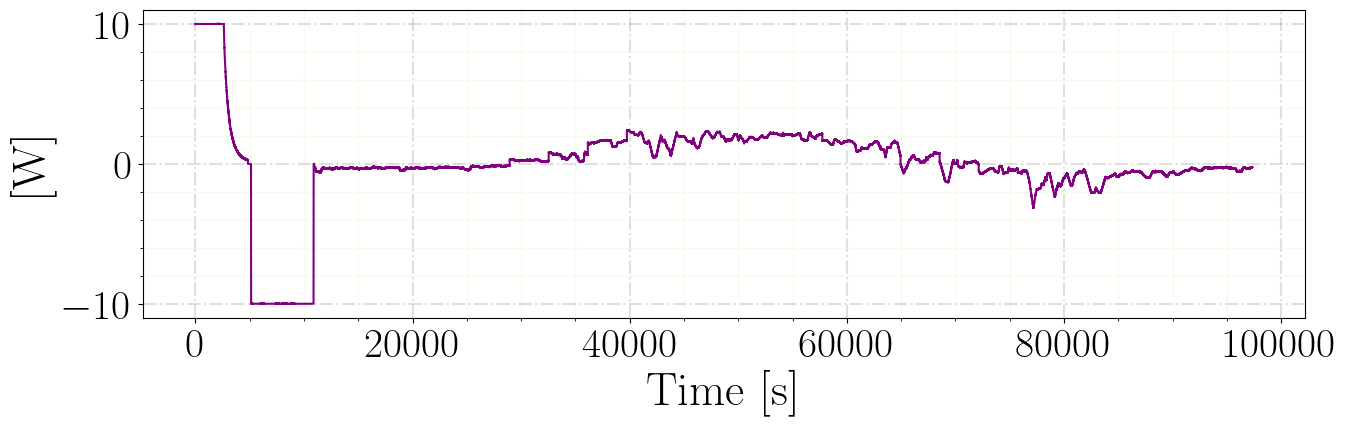

In [40]:
plot_separated_vars(**args[exp])